<a href="https://colab.research.google.com/github/BELMALLEM/Coursera-IBM-Data-Science-Certificate/blob/master/Capstone/Final%20Capstone%20Project/Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Best Land to Buy in Casablanca, Morocco</h1>
<h4>Can I find a great land to buy in my city ? </h4><br>

<p>This notebook is about getting data of lands in Casablanca city in order to determine with machine learning algorithms different types of fields, to give insights about the best lands to buy.</p>

-----    Marouane BELMALLEM (2020, September). -----


Let's get the necessary elements and modules for our project

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install geocoder
import geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 102kB 2.7MB/s 
Libraries imported.


In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd


## Getting data from Web: Web Scraping Part

Here are three functions created to get data from a web page of lands' ads in Casablanca city in Morocco

* The first is gets the raw HMTL content of a single page*

In [3]:
def get_page(page):
  url = "https://www.sarouty.ma/fr/recherche?c=1&l=35&ob=mr&page=" + str(page) + "&t=5"
  
  content = requests.get(url)
  if(content.status_code == 200):
    print("The page " + str(page) + " has been successfully retrieved")
  return content

* This one filter the needed data in a gotten page

In [4]:
def get_data():
  data_list = []
  for page in range(1, 20):
    content = get_page(page)
    soup = BeautifulSoup(content.text, 'html.parser')
    cardlist_items = soup.find_all(class_='card-list__item')
    
    for item in cardlist_items:
       data_list.append( [ el.text for el in ( item.find_all(['h2', 'p']) ) ] )
  return data_list




* We need cleaned data to work with rather than bag of HTML Tags, so this function do the job

In [5]:
def data_cleaning(data):
  for element in data:
    if len(element) > 5:
      del element[-1]

    element[0] = int(''.join(filter(str.isdigit, element[0])))
    element[4] = int(element[4].replace("\xa0", "").split()[0])
    
    slicedElement = element[2].split(",")
    element[2] = slicedElement[0]
    element.append(slicedElement[1])
    
    

    

In [6]:
#Applying the functions
data = get_data()
data_cleaning(data)

The page 1 has been successfully retrieved
The page 2 has been successfully retrieved
The page 3 has been successfully retrieved
The page 4 has been successfully retrieved
The page 5 has been successfully retrieved
The page 6 has been successfully retrieved
The page 7 has been successfully retrieved
The page 8 has been successfully retrieved
The page 9 has been successfully retrieved
The page 10 has been successfully retrieved
The page 11 has been successfully retrieved
The page 12 has been successfully retrieved
The page 13 has been successfully retrieved
The page 14 has been successfully retrieved
The page 15 has been successfully retrieved
The page 16 has been successfully retrieved
The page 17 has been successfully retrieved
The page 18 has been successfully retrieved
The page 19 has been successfully retrieved


In [7]:
#Data list gotten from web using BeautifulSoup scraping tool
data[:3]

[[5494500,
  'Dar Bouazza ,Terrain 999 m² zone villa en vente',
  'Dar Bouazza',
  'Terrain',
  999,
  ' Casablanca'],
 [4950000,
  'TERRAIN A VENDRE SUR BOULVARD GRAND CEINTURE AINDIAB',
  'Ain Diab',
  'Terrain',
  400,
  ' Casablanca'],
 [37180000,
  'Villa à vendre sur Darbouazza Balnéaire R+2 vue sur mer',
  'Dar Bouazza',
  'Terrain',
  5720,
  ' Casablanca']]

## Raw Data to DataFrames: Pandas are Doing the Job

In [8]:
# List of data from the scraper to DataFrame
df = pd.DataFrame(data, columns =['Total Price', 'Description', 'Neighborhood', 'Type of Land', 'Total Area', 'City'])
df.head()

,Total Price,Description,Neighborhood,Type of Land,Total Area,City
0,5494500,"Dar Bouazza ,Terrain 999 m² zone villa en vente",Dar Bouazza,Terrain,999,Casablanca
1,4950000,TERRAIN A VENDRE SUR BOULVARD GRAND CEINTURE A...,Ain Diab,Terrain,400,Casablanca
2,37180000,Villa à vendre sur Darbouazza Balnéaire R+2 vu...,Dar Bouazza,Terrain,5720,Casablanca
3,10700000,Terrain pour villa 714m² à Bourgogne Lahjajma ...,Bourgogne,Terrain,714,Casablanca
4,9000000,Terrain A vendre quartier anfa supérieur,Anfa Supérieur,Terrain,440,Casablanca


In [9]:
# We have Total Price of a piece of land and its area
# So we need its Single Price of each m2
df['Single Price'] = df['Total Price'] / df['Total Area']
df.head()

,Total Price,Description,Neighborhood,Type of Land,Total Area,City,Single Price
0,5494500,"Dar Bouazza ,Terrain 999 m² zone villa en vente",Dar Bouazza,Terrain,999,Casablanca,5500.000000
1,4950000,TERRAIN A VENDRE SUR BOULVARD GRAND CEINTURE A...,Ain Diab,Terrain,400,Casablanca,12375.000000
2,37180000,Villa à vendre sur Darbouazza Balnéaire R+2 vu...,Dar Bouazza,Terrain,5720,Casablanca,6500.000000
3,10700000,Terrain pour villa 714m² à Bourgogne Lahjajma ...,Bourgogne,Terrain,714,Casablanca,14985.994398
4,9000000,Terrain A vendre quartier anfa supérieur,Anfa Supérieur,Terrain,440,Casablanca,20454.545455


In [10]:
#Slice the dataframe and get the important columns
df1 = df[['Neighborhood', 'Total Price', 'Total Area', 'Single Price']].sort_values(by = 'Neighborhood').reset_index(drop = True)


#Convert the single price values to integer
df1['Single Price'] = df1['Single Price'].astype(int)

#Filter useless and wrong data
df1 = df1[df1['Total Area'] > 100]
df1 = df1[df1['Single Price'] > 100]
df1 = df1[df1['Neighborhood'] != "indéfini"]

df1.head()

,Neighborhood,Total Price,Total Area,Single Price
0,2 Mars,4700000,178,26404
1,2 Mars,47000000,400000,117
6,Ain Diab,8722000,623,14000
8,Ain Diab,8400000,800,10500
9,Ain Diab,9672000,806,12000


In [11]:
df1.describe()

,Total Price,Total Area,Single Price
count,2.900000e+02,290.000000,290.000000
mean,1.491377e+07,3840.893103,17174.986207
std,1.512753e+07,24176.109602,23136.827128
min,7.900000e+05,120.000000,117.000000
25%,5.495875e+06,400.750000,7104.000000
50%,1.000000e+07,667.000000,14876.000000
75%,1.750000e+07,1140.750000,21976.750000
max,8.000000e+07,400000.000000,312500.000000


In [12]:
#Grouping and getting Avg. Price of each group
df_avg_price = df1.groupby(by='Neighborhood', as_index=False)['Single Price'].mean().sort_values(by='Single Price').reset_index(drop = True)
df_avg_price.columns = ['Neighborhood', 'Avg. Price']

df_avg_price.head()

,Neighborhood,Avg. Price
0,had soualem,380.0
1,Lakhyayta,440.0
2,Zone Industrielle Casablanca,800.0
3,Sbata,857.0
4,Sidi Moumen,2000.0


In [13]:
#Now we merge the groups of neighborhoods with their avg. with the Pricipal df 
df1 = pd.merge(df1, df_avg_price, on='Neighborhood', how='outer')
df1.head()

,Neighborhood,Total Price,Total Area,Single Price,Avg. Price
0,2 Mars,4700000,178,26404,13260.50
1,2 Mars,47000000,400000,117,13260.50
2,Ain Diab,8722000,623,14000,13216.88
3,Ain Diab,8400000,800,10500,13216.88
4,Ain Diab,9672000,806,12000,13216.88


* Time to get GeoData. The coordinates of each Neighborhood

In [14]:
import random

def get_coords(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        #random value to add to a neighborhood coordinates to plot different points for each neighborhood
        rand = random.uniform(-0.009, 0.009)

        g = geocoder.arcgis('{}, Casablanca, Morocco'.format(neighborhood))
        lat_lng_coords = map(lambda x:x+rand, g.latlng)
    return lat_lng_coords

In [15]:
# define a function to get coordinates
coordinates1 = [ get_coords(neighborhood) for neighborhood in df1["Neighborhood"].tolist()]

In [16]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
coordinates = pd.DataFrame(coordinates1, columns=['Latitude', 'Longitude'])
print(coordinates.shape)
coordinates.head()

(290, 2)


,Latitude,Longitude
0,33.558501,-7.613809
1,33.570784,-7.601526
2,33.596236,-7.619264
3,33.593722,-7.621778
4,33.591340,-7.624160


In [17]:
df_merge=pd.concat([df1,coordinates],axis=1)
print(df_merge.shape)
df_merge.head()

(290, 7)


,Neighborhood,Total Price,Total Area,Single Price,Avg. Price,Latitude,Longitude
0,2 Mars,4700000,178,26404,13260.50,33.558501,-7.613809
1,2 Mars,47000000,400000,117,13260.50,33.570784,-7.601526
2,Ain Diab,8722000,623,14000,13216.88,33.596236,-7.619264
3,Ain Diab,8400000,800,10500,13216.88,33.593722,-7.621778
4,Ain Diab,9672000,806,12000,13216.88,33.591340,-7.624160


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


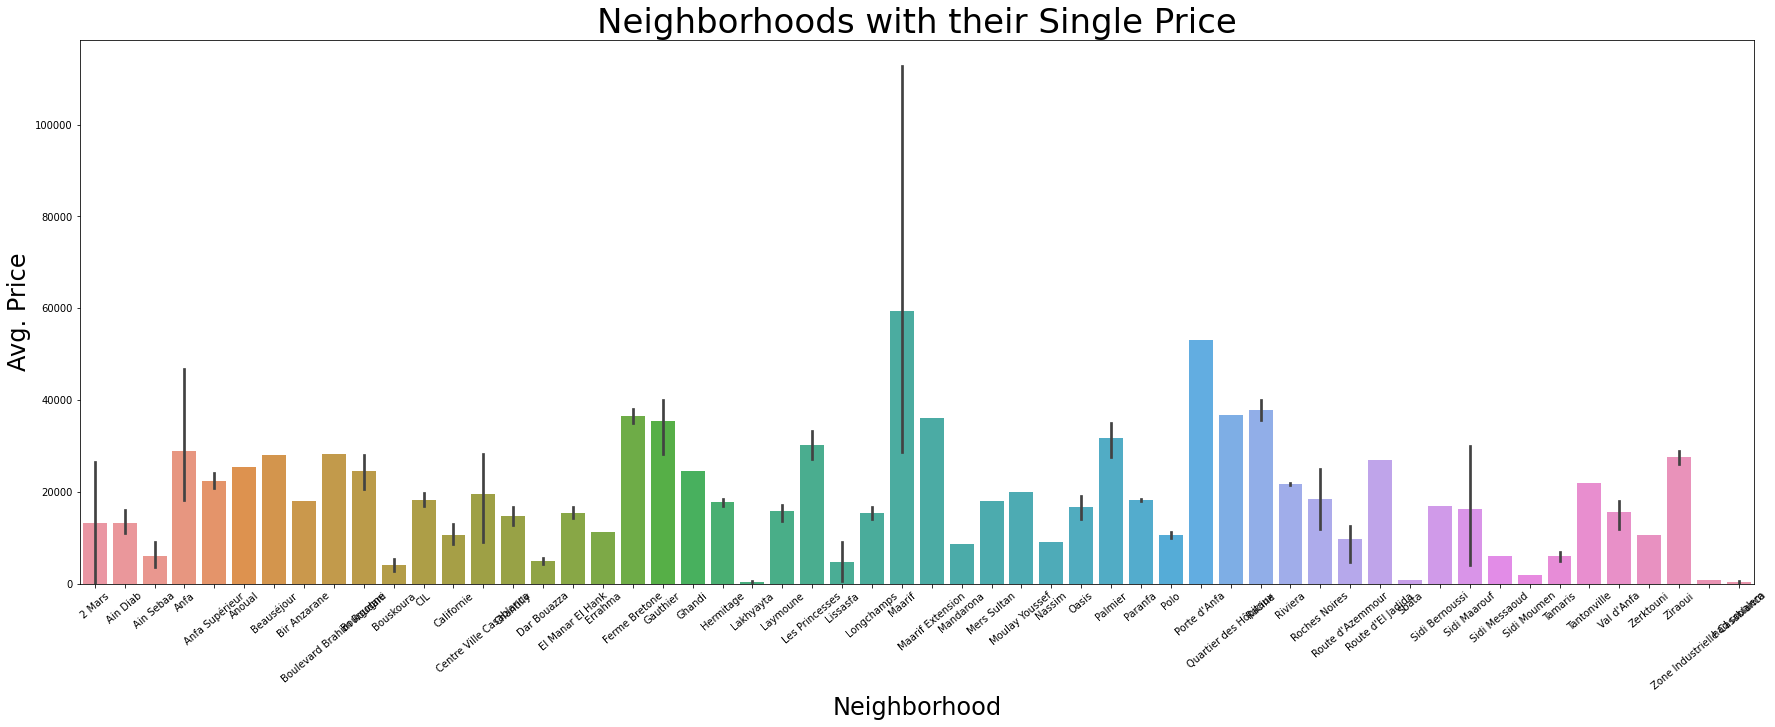

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(30,10))
bar = sns.barplot(x="Neighborhood", y="Single Price", data=df_merge)

bar.set_ylabel("Avg. Price", fontsize=24)
bar.set_xlabel("Neighborhood", fontsize=24)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Neighborhoods with their Single Price", fontsize=34)
plt.show()

In [19]:
address = 'Casablanca'

geolocator = Nominatim(user_agent="project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Connecticut are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Connecticut are 33.5950627, -7.6187768.


In [20]:
# create map of CT using latitude and longitude values
map_ct = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, Price, Neighborhood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Single Price'], df_merge['Neighborhood']):
    label = '{},\nPrice: {}'.format(Neighborhood, Price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ct)  
    
map_ct

In [21]:
df_clustering = df_merge[['Total Price', 'Total Area', 'Single Price', 'Avg. Price' ]]
df_clustering.head()


,Total Price,Total Area,Single Price,Avg. Price
0,4700000,178,26404,13260.50
1,47000000,400000,117,13260.50
2,8722000,623,14000,13216.88
3,8400000,800,10500,13216.88
4,9672000,806,12000,13216.88


In [22]:
df_clustering_scaled = (df_clustering - df_clustering.mean()) / df_clustering.std()
df_clustering_scaled.head()

,Total Price,Total Area,Single Price,Avg. Price
0,-0.675177,-0.151509,0.398888,-0.308064
1,2.121049,16.386388,-0.737266,-0.308064
2,-0.409304,-0.133102,-0.137227,-0.311497
3,-0.430590,-0.125781,-0.288501,-0.311497
4,-0.346505,-0.125533,-0.223669,-0.311497


## Clustering Data to Get Insights: AI Part

In [23]:
from sklearn import metrics
from scipy.spatial.distance import cdist

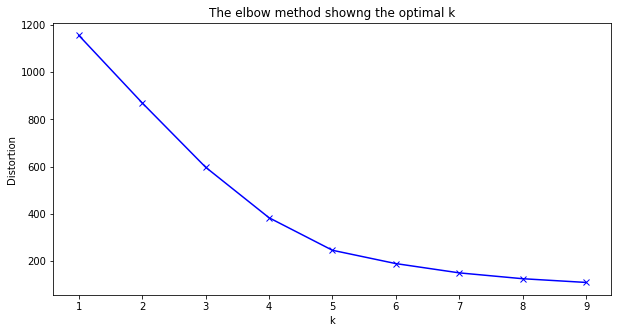

In [24]:
#Elbow Method To determine the optimal k to use as the number of clusters 
%matplotlib inline

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_clustering_scaled)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,5))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showng the optimal k')
plt.plot(K, distortions, 'bx-')
plt.show()

In [25]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int32)

In [28]:
# add clustering labels
#df_merge.insert(0, 'Cluster Labels', kmeans.labels_)

ct_merged = df_merge

# Add latitude/longitude for each neighborhood
#ct_merged = ct_merged.join(df_merge.set_index('Neighborhood'), on='Neighborhood')
ct_merged.head() # check the last columns!

,Neighborhood,Total Price,Total Area,Single Price,Avg. Price,Latitude,Longitude,Cluster Labels
0,2 Mars,4700000,178,26404,13260.50,33.558501,-7.613809,0
1,2 Mars,47000000,400000,117,13260.50,33.570784,-7.601526,2
2,Ain Diab,8722000,623,14000,13216.88,33.596236,-7.619264,0
3,Ain Diab,8400000,800,10500,13216.88,33.593722,-7.621778,0
4,Ain Diab,9672000,806,12000,13216.88,33.591340,-7.624160,0


In [29]:
# create map of CT using latitude and longitude values
map_ct = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, Price, Neighborhood, cluster_label in zip(ct_merged['Latitude'], ct_merged['Longitude'], ct_merged['Single Price'], ct_merged['Neighborhood'], ct_merged['Cluster Labels']):
    label = '{},\nPrice: {}'.format(Neighborhood, Price)
    label = folium.Popup(label, parse_html=True)
    #Colors for different clusters
    cluster_color = {0:"#FF0000", 1:"#00FF00", 2:"#FF00FF", 3:"#0000FF", 4:"#FF00FF"}
        
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_color = cluster_color[cluster_label],
        fill_opacity=0.7,
        parse_html=False).add_to(map_ct)  
    
map_ct

*This Project has just begun, I wish I could make it better in futur*

**Thank you for reading this Notebook hoping it was helpful**

Linkedin: https://www.linkedin.com/in/marouane-belmallem

Github: https://github.com/BELMALLEM